In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Data Acquisition, Web Scraping and Web APIs *

# Table of Contents
* [Data Acquisition, Web Scraping and Web APIs *](#Lecture-5---Data-Acquisition,-Web-Scraping-and-Web-APIs-*)
	* &nbsp;
		* [Content](#Content)
		* [Learning Outcomes](#Learning-Outcomes)
* [Data Acquisition](#Data-Acquisition)
* [1. Web scraping](#1.-Web-scraping)
	* [HTML](#HTML)
		* &nbsp;
			* [What is HTML?](#What-is-HTML?)
	* [Intro to Web Scraping](#Intro-to-Web-Scraping)
		* [--- WARNING ---](#----WARNING----)
	* [2. Web APIs](#2.-Web-APIs)
		* [REST](#REST)
		* [JSON](#JSON)
		* [Forming an API query](#Forming-an-API-query)
	* [Current International Space Station Details](#Current-International-Space-Station-Details)
	* [Dedicated API Wrapper Modules](#Proprietary-API-Wrapper-Modules)
	* [API Repositories and Market Places](#API-Repositories-and-Market-Places)


---
* Some material on web scraping and usage of APIs adapted from Kevin Markham's data science courses at https://github.com/justmarkham

### Content

1. Data gathering via web scraping
2. HTML basics
3. Data gathering via web APIs
4. JSON file format

### Learning Outcomes

At the end of this lecture, you should be able to:

* list the different dynamic sources of data
* explain what HTML is and its basic structure
* make HTTP requests using python
* traverse the HTML document tree
* perform web scraping at an introductory level
* describe and process the JSON file format
* perform rudimentary data acquisition using Web APIs



---

# Data Acquisition

So far, we have looked at how we can acquire data from pre-prepared Excel and text files in the CSV format. We also saw how we can use pandas clipboard facility to paste and build data frames. 

We also experienced that much of the data does not come in tidy formats that are prepared and ready for data analysis. For this we learned a number of techniques that help us to wrangle and tidy our data into shape. 

Now we are going to look at two additional sources of data that are dynamic and will require the combination of all the techniques we learned previously, such as wrangling, merging, aggregation, as well as some new skills. 

It is becoming common these days that data is acquired from multiple sources and merged into a single dataset. The data sources that are increasingly becoming the backbone of many analytics and information systems are web based.

This section considers how data can be read (scraped) from web pages (HTML documents), and how data can be retrieved from web servers using their application program interfaces (APIs).

# 1. Web scraping

Often when we need to acquire data, web pages are a great resource to turn to. Many websites make data available on their web pages for viewing in a browser, but do not make it conveniently downloadable as an easily machine-readable format like JSON, CSV, or XML. Because of this, we sometimes need to employ web scraping techniques.

The term "web scraping" refers to an application or script that processes HTML pages. This is done in order to extract data embedded in HTML for manipulation. 

Web scraping applications in effect simulate a person viewing a website with a browser.

Our task then becomes writing scripts that can traverse the structure of HTML documents and locate the particular piece of data we need.

## HTML

#### What is HTML?

HTML is a markup language (not a programming language) for describing web documents (web pages).

    HTML stands for Hyper Text Markup Language
    A markup language is a set of markup tags
    HTML documents are described by HTML tags
    Each HTML tag describes different document content

HTML pages consist of elements. Elements are marked up by tags, and the tags may have attributes inside them which describe how the content should be rendered by web browsers. The initial tag specifies the type of the document so that the browsers render the content correctly.

Please refer to http://www.w3schools.com/html/html_intro.asp for an introduction to HTML.

The examples below will show how we can perform web scraping on HTML pages using a Python package called `BeautifulSoup`. 

BeautifulSoup is an HTML/XML parser for Python that can turn markup text into a parse tree, that can then be traversed more easily.

In [2]:
from IPython.display import HTML, IFrame
IFrame("http://www.crummy.com/software/BeautifulSoup/bs4/doc/", width=1100, height=500)



BeautifulSoup provides a simplified, idiomatic way of navigating, searching, and modifying parse tree generated by HTML and XML.

More info on BeautifulSoup http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html

Good examples of how this is done can be found in : http://www.gregreda.com/2013/03/03/web-scraping-101-with-python/ and http://blog.miguelgrinberg.com/post/easy-web-scraping-with-python

## Intro to Web Scraping

We are going to begin with a toy example first using the simple html page created below:

In [2]:
# imports
import requests                 # How Python gets the webpages
from bs4 import BeautifulSoup   # Creates structured, searchable object
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
## !PIP install PRETTYPRINT
import prettyprint as pp


In [3]:
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

%matplotlib inline

In [9]:
# First, let's read the toy webpage as a string - this is what happens initially when you scrape any webpage
html_doc = """
<!doctype html>
<html lang="en">
<head>
  <title>Teo's Webpage</title>
</head>

<body>
  <h1>Teo's Webpage</h1>
  <p id="intro">My name is Teo.  I find web scraping interesting.</p>
  <p id="background">I live in Auckland and completed my PhD at Massey University in Computer Science, while studying the field of machine learning.</p>
  <p id="current">I currently work as a lecturer in Information Technology.</p>
  
  <h3>My Interests</h3>
  <ul>
      <li id="my favorite">Data Science and Machine Learning</li>
      <li class="hobby">Tennis</li>
      <li class="hobby">Reading</li>
      <li class="hobby">Travelling</li>
      <li class="hobby">Running</li>
  </ul>
</body>
</html>
"""
type(html_doc)

str

In [10]:
# Beautiful soup allows us to create structure from the html elements, and to traverse it
page = BeautifulSoup(html_doc, "lxml")
print(type(page))
page

<class 'bs4.BeautifulSoup'>


<!DOCTYPE html>
<html lang="en">
<head>
<title>Teo's Webpage</title>
</head>
<body>
<h1>Teo's Webpage</h1>
<p id="intro">My name is Teo.  I find web scraping interesting.</p>
<p id="background">I live in Auckland and completed my PhD at Massey University in Computer Science, while studying the field of machine learning.</p>
<p id="current">I currently work as a lecturer in Information Technology.</p>
<h3>My Interests</h3>
<ul>
<li id="my favorite">Data Science and Machine Learning</li>
<li class="hobby">Tennis</li>
<li class="hobby">Reading</li>
<li class="hobby">Travelling</li>
<li class="hobby">Running</li>
</ul>
</body>
</html>

In [11]:
# The most useful methods in a Beautiful Soup object are "find" and "findAll".
# "find" takes several parameters, the most important are "name" and "attrs".
# name will help us find the type of an element
# Let's target "name".
page.find(name='body') # Finds the 'body' tag and everything inside of it.

<body>
<h1>Teo's Webpage</h1>
<p id="intro">My name is Teo.  I find web scraping interesting.</p>
<p id="background">I live in Auckland and completed my PhD at Massey University in Computer Science, while studying the field of machine learning.</p>
<p id="current">I currently work as a lecturer in Information Technology.</p>
<h3>My Interests</h3>
<ul>
<li id="my favorite">Data Science and Machine Learning</li>
<li class="hobby">Tennis</li>
<li class="hobby">Reading</li>
<li class="hobby">Travelling</li>
<li class="hobby">Running</li>
</ul>
</body>

In [12]:
body = page.find(name='body')
type(body) #element.Tag

bs4.element.Tag

The above result tells us that 'body' element was found in the HTML page, and it tells us what object type it is. When the find fails, then this is what we get:

In [13]:
body = page.find(name='bodyyy')
type(body) #element.Tag

NoneType

We can see its content below

In [14]:
body = page.find(name='body')
body.contents

['\n',
 <h1>Teo's Webpage</h1>,
 '\n',
 <p id="intro">My name is Teo.  I find web scraping interesting.</p>,
 '\n',
 <p id="background">I live in Auckland and completed my PhD at Massey University in Computer Science, while studying the field of machine learning.</p>,
 '\n',
 <p id="current">I currently work as a lecturer in Information Technology.</p>,
 '\n',
 <h3>My Interests</h3>,
 '\n',
 <ul>
 <li id="my favorite">Data Science and Machine Learning</li>
 <li class="hobby">Tennis</li>
 <li class="hobby">Reading</li>
 <li class="hobby">Travelling</li>
 <li class="hobby">Running</li>
 </ul>,
 '\n']

In [15]:
list(enumerate(body.contents))

[(0, '\n'),
 (1, <h1>Teo's Webpage</h1>),
 (2, '\n'),
 (3, <p id="intro">My name is Teo.  I find web scraping interesting.</p>),
 (4, '\n'),
 (5,
  <p id="background">I live in Auckland and completed my PhD at Massey University in Computer Science, while studying the field of machine learning.</p>),
 (6, '\n'),
 (7,
  <p id="current">I currently work as a lecturer in Information Technology.</p>),
 (8, '\n'),
 (9, <h3>My Interests</h3>),
 (10, '\n'),
 (11, <ul>
  <li id="my favorite">Data Science and Machine Learning</li>
  <li class="hobby">Tennis</li>
  <li class="hobby">Reading</li>
  <li class="hobby">Travelling</li>
  <li class="hobby">Running</li>
  </ul>),
 (12, '\n')]

We can recursively search for other elements inside the returned result as well:

In [16]:
h1 = body.find(name='h1') # Find the 'h1' element inside of the 'body' tag
h1

<h1>Teo's Webpage</h1>

In [17]:
h1.text  ## return string

"Teo's Webpage"

In [18]:
h1.contents  ## convert into a list

["Teo's Webpage"]

Notice how we can access the entire element or just the content. 

Now let's find the 'p' elements:

In [19]:
p = page.find(name='p')
# This only finds one.  This is where 'findAll' comes in.
p

<p id="intro">My name is Teo.  I find web scraping interesting.</p>

We can also do a search of all instances of an element:

In [20]:
all_p = page.findAll(name='p')
print(all_p)
type(all_p) # Result sets are a lot like Python lists

[<p id="intro">My name is Teo.  I find web scraping interesting.</p>, <p id="background">I live in Auckland and completed my PhD at Massey University in Computer Science, while studying the field of machine learning.</p>, <p id="current">I currently work as a lecturer in Information Technology.</p>]


bs4.element.ResultSet

Access specific element with index:

In [21]:
print(all_p[0])
print(all_p[1])

<p id="intro">My name is Teo.  I find web scraping interesting.</p>
<p id="background">I live in Auckland and completed my PhD at Massey University in Computer Science, while studying the field of machine learning.</p>


In [22]:
print(all_p[2])

<p id="current">I currently work as a lecturer in Information Technology.</p>


In [23]:
# Iterable like  list
for one_p in all_p:
    print(one_p.text) # Print text

My name is Teo.  I find web scraping interesting.
I live in Auckland and completed my PhD at Massey University in Computer Science, while studying the field of machine learning.
I currently work as a lecturer in Information Technology.


Access specific attribute of a tag:

In [24]:
all_p[0] # Specific element

<p id="intro">My name is Teo.  I find web scraping interesting.</p>

In [25]:
all_p[0]['id'] # Specific attribute value of a specific element

'intro'

Now let's look at 'attrs'. Beautiful soup also allows us to locate elements with specific attributes:

In [26]:
page.find(name='p', attrs={"id":"intro"})  ## p for paragraph

<p id="intro">My name is Teo.  I find web scraping interesting.</p>

In [27]:
page.find(name='p', attrs={"id":"background"})

<p id="background">I live in Auckland and completed my PhD at Massey University in Computer Science, while studying the field of machine learning.</p>

In [28]:
result = page.find(name='p', attrs={"id":"current"})
result.text

'I currently work as a lecturer in Information Technology.'

Again we can also do a search of all instances of an element and name of a class:

In [29]:
page.findAll("li", "hobby")  ## The HTML <li> element is used to represent an item in a list.

[<li class="hobby">Tennis</li>,
 <li class="hobby">Reading</li>,
 <li class="hobby">Travelling</li>,
 <li class="hobby">Running</li>]

**Exercise:** Extract the 'h3' element from Teo's webpage.

In [30]:
h3 = body.find(name='h3') # Find the 'h3' element inside of the 'body' tag
h3

<h3>My Interests</h3>

**Exercise:** Extract Teo's hobbies from the html_doc.  Print out the text of the hobby. 

In [33]:
hobbies = page.findAll(name='ul')  ## Search Results Featured snippet from the web The <ul> tag defines an unordered (bulleted) list. Use the <ul> tag together with the <li> tag to create unordered lists.

# Iterable like  list
for hobby in hobbies:
    print(hobby.text) # Print text


Data Science and Machine Learning
Tennis
Reading
Travelling
Running



**Exercise:** Extract Teo's hobby that has the id "my favorite".

In [31]:
result = page.find(name='li', attrs={"id":"my favorite"})
result.text

'Data Science and Machine Learning'

## Example 

We will illustrate this concept further on an example scraping website called http://example.webscraping.com/places/default/view/New-Zealand-159, where will will attempt to scrape data describing various countries.



We will try and pull the population size of NZ.

In order to find where the price is situated in the HTML document, we must look at the document's source code. By right clicking on a page in a browser, an option should be displayed allowing you to view the source.

We must inspect the source so that we can find the element that houses this value. We can then use the python's BeautifulSoup package to **read and traverse through the HTML element tree** in order to extract the data that we want.

There are three basic steps to scraping a single page:

    1. Get (request) the page
    2. Parse the page content (read and interpret the document structure)
    3. Search through the content of interest


Below is the example of a script that will access and display the population value for NZ:


In [34]:
#we first need to make some extra imports
import json
from time import sleep
from datetime import datetime


**STEP 1: GET** Access the page and read it into the beautiful soup object

In [35]:
url = "http://example.webscraping.com/places/default/view/New-Zealand-159"
response = requests.get(url) 
response

<Response [200]>

### --- WARNING --- 

ALWAYS FIRST MAKE SURE THAT THE RESPONSE IS 200 - OTHERWISE YOU MIGHT HAVE AN ERROR, IN WHICH CASE YOU'D BE BEST TO STOP AND NOT TRY TO PROCESS THE DOCUMENT, SINCE THERE WILL BE NOTHING TO PROCESS

In [36]:
page = response.content

In [37]:
page[:10000]

b'<!--[if HTML5]><![endif]-->\n<!DOCTYPE html>\n<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->\n<!--[if lt IE 7]><html class="ie ie6 ie-lte9 ie-lte8 ie-lte7 no-js" lang="en-us"> <![endif]-->\n<!--[if IE 7]><html class="ie ie7 ie-lte9 ie-lte8 ie-lte7 no-js" lang="en-us"> <![endif]-->\n<!--[if IE 8]><html class="ie ie8 ie-lte9 ie-lte8 no-js" lang="en-us"> <![endif]-->\n<!--[if IE 9]><html class="ie9 ie-lte9 no-js" lang="en-us"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->\n<head>\n<title>Example web scraping website</title>\n  <!--[if !HTML5]>\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n  <![endif]-->\n  <!-- www.phpied.com/conditional-comments-block-downloads/ -->\n  <!-- Always force latest IE rendering engine\n       (even in intranet) & Chrome Frame\n       Remove this if you use the .htaccess -->\n\t   \n  <meta charset="utf-8" />\n\n  <!-- http://dev.w3.org/html5/markup/m

**STEP 2: PARSE** Create a BeautifulSoup object that reads and parses the HTML page into a format that we can search and traverse.

In [38]:
scraping = BeautifulSoup(page, "lxml") 

In [39]:
scraping

<!--[if HTML5]><![endif]--><!DOCTYPE html>
<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ --><!--[if lt IE 7]><html class="ie ie6 ie-lte9 ie-lte8 ie-lte7 no-js" lang="en-us"> <![endif]--><!--[if IE 7]><html class="ie ie7 ie-lte9 ie-lte8 ie-lte7 no-js" lang="en-us"> <![endif]--><!--[if IE 8]><html class="ie ie8 ie-lte9 ie-lte8 no-js" lang="en-us"> <![endif]--><!--[if IE 9]><html class="ie9 ie-lte9 no-js" lang="en-us"> <![endif]--><!--[if (gt IE 9)|!(IE)]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>Example web scraping website</title>
<!--[if !HTML5]>
      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
  <![endif]-->
<!-- www.phpied.com/conditional-comments-block-downloads/ -->
<!-- Always force latest IE rendering engine
       (even in intranet) & Chrome Frame
       Remove this if you use the .htaccess -->
<meta charset="utf-8"/>
<!-- http://dev.w3.org/html5/markup/meta.name.html -->
<meta content="places" name="

Now we can search for a given tag, id or class name.

**STEP 3: SEARCH** Search through the page for 'tr' type tags with the 'id' having the 'places_population__row' value:

In [40]:
element = scraping.find("tr", attrs={"id" : "places_population__row"})  ## The <tr> tag specifies a row in an HTML table.
element

<tr id="places_population__row"><td class="w2p_fl"><label class="readonly" for="places_population" id="places_population__label">Population: </label></td><td class="w2p_fw">4,252,277</td><td class="w2p_fc"></td></tr>

The returned result has three elements as seen below:

In [41]:
element.contents

[<td class="w2p_fl"><label class="readonly" for="places_population" id="places_population__label">Population: </label></td>,
 <td class="w2p_fw">4,252,277</td>,
 <td class="w2p_fc"></td>]

There are differnt ways of honing in on the data that we need from this, but one option could be to perform another search:

In [42]:
element = element.find(attrs={"class" : "w2p_fw"})
element

<td class="w2p_fw">4,252,277</td>

Once we have found the tag we want, we extract the contents of it by calling .contents and optionally convert it into an int.

In [43]:
element.contents[0]

'4,252,277'

In [44]:
element.contents[0].replace(',', '')

'4252277'

In [45]:
int(element.contents[0].replace(',', ''))

4252277

As it turns out, there are multiple tags in the document with this tag-name combination. 

**Exercise:** Scrape the information on Singapore from this page: http://example.webscraping.com/places/default/view/Singapore-203, by extracting the Area value and converting it into an int.

In [71]:
# step 1 fetech page
url = "http://example.webscraping.com/places/default/view/Singapore-203"
response = requests.get(url) 
response

<Response [200]>

In [72]:
# step 2 parse
scraping = BeautifulSoup(response.content, "lxml") 

In [73]:
# step 3 search
element = scraping.find("tr", attrs={"id" : "places_population__row"})
element = element.find(attrs={'class' : 'w2p_fw'})
int(element.contents[0].replace(',', ''))

4701069

We can also read in entire HTML tables into dataframe objects:

Here is an example of how to read in the ASCII table from a wikipedia page: https://en.wikipedia.org/wiki/ASCII

In [74]:
#step 1
url = "https://en.wikipedia.org/wiki/ASCII"
response = requests.get(url)
response

<Response [200]>

In [75]:
scraping_html_table_EQ = BeautifulSoup(response.content, "lxml") 

scraping_html_table_EQ = scraping_html_table_EQ.find_all("table", "wikitable")

df = pd.read_html(str(scraping_html_table_EQ))
first_table_df = df[0]
first_table_df.columns = first_table_df.iloc[0]
first_table_df = first_table_df.iloc[2:]
first_table_df

,Binary,Oct,Dec,Hex,Abbreviation,[b],[c],[d],Name (1967),nan,nan
2,000 0000,000,0,00,NaN,NUL,␀,^@,\0,Null,NaN
3,000 0001,001,1,01,SOM,SOH,␁,^A,NaN,Start of Heading,NaN
4,000 0010,002,2,02,EOA,STX,␂,^B,NaN,Start of Text,NaN
5,000 0011,003,3,03,EOM,ETX,␃,^C,NaN,End of Text,NaN
6,000 0100,004,4,04,EOT,␄,^D,NaN,End of Transmission,NaN,NaN
7,000 0101,005,5,05,WRU,ENQ,␅,^E,NaN,Enquiry,NaN
8,000 0110,006,6,06,RU,ACK,␆,^F,NaN,Acknowledgement,NaN
9,000 0111,007,7,07,BELL,BEL,␇,^G,\a,Bell,NaN
10,000 1000,010,8,08,FE0,BS,␈,^H,\b,Backspace[e][f],NaN
11,000 1001,011,9,09,HT/SK,HT,␉,^I,\t,Horizontal Tab[g],NaN


**Exercise**: Read the second table from the same webpage into a data frame object:

In [76]:
scraping_html_table_EQ = BeautifulSoup(response.content, "lxml") 

scraping_html_table_EQ = scraping_html_table_EQ.find_all("table", "wikitable")

df = pd.read_html(str(scraping_html_table_EQ))
second_table_df = df[1]  ## slice into the second table
second_table_df

,0,1,2,3,4,5,6
0,Binary,Oct,Dec,Hex,Glyph,NaN,NaN
1,1963,1965,1967,NaN,NaN,NaN,NaN
2,010 0000,040,32,20,space,NaN,NaN
3,010 0001,041,33,21,!,NaN,NaN
4,010 0010,042,34,22,"""",NaN,NaN
5,010 0011,043,35,23,#,NaN,NaN
6,010 0100,044,36,24,$,NaN,NaN
7,010 0101,045,37,25,%,NaN,NaN
8,010 0110,046,38,26,&,NaN,NaN
9,010 0111,047,39,27,',NaN,NaN


## 2. Web APIs

Web servers serve out web pages in the HTML format as they are requested by users. Web servers are also capable of providing data that is not formatted in HTML. 

These web servers provide public (and private) APIs through which users can interact, construct queries that the web servers understand, and receive data from them. 

Depending on who owns them, web servers will have different APIs. They usually provide developer help pages that demonstrate how they work and how queries can be constructed using HTTP which the servers understand.

Many websites have public APIs providing data feeds via JSON or some other common formats. We will consider only **JSON** as it is becoming a standard, and is conveniently, virtually identical to python's dictionaries in its syntax. 

Increasingly though, in order to access these APIs we must register for API Keys. They are **credentials**. Some of them are free and simply require that an account be created with a given website, while others must be purchased and have limits on the amount of data that can be pulled.

There are a number of ways to access these APIs. **REST** is becoming the most common mechanism and often uses **JSON** as the format for transmitting data. 

### JSON

JSON (short for JavaScript Object Notation) has become one of the standard formats
for sending data by HTTP request between web servers and browsers and other applications. 

It is a much more flexible data format than a tabular text form like CSV. 

Here is an example:

In [77]:
#In Python triple-quoted strings allow us to include strings that have escape chars in it.
obj = """
{"name": "Massey University",
"campuses_NZ": ["Albany", "Palmerston North", "Wellington"],
"campuses_international": null,
"colleges": [{"name": "Sciences", "degrees": 10, "majors": 30},
{"name": "Business", "degrees": 8, "majors": 25}]
}
"""
obj


'\n{"name": "Massey University",\n"campuses_NZ": ["Albany", "Palmerston North", "Wellington"],\n"campuses_international": null,\n"colleges": [{"name": "Sciences", "degrees": 10, "majors": 30},\n{"name": "Business", "degrees": 8, "majors": 25}]\n}\n'

JSON is very nearly valid Python code with the exception of its null value `null` and
some other nuances (such as disallowing trailing commas at the end of lists). The basic
types are objects (dicts), arrays (lists), strings, numbers, booleans, and nulls. 

**All of the keys in an object must be strings**. There are several Python libraries for reading and
writing JSON data. We will use `json` here as it is built into the Python standard library. 

To convert (deserialize) a JSON string from above to an equivalent Python object (`dict`), use `json.loads`:

In [78]:
result = json.loads(obj)
result

{'name': 'Massey University',
 'campuses_NZ': ['Albany', 'Palmerston North', 'Wellington'],
 'campuses_international': None,
 'colleges': [{'name': 'Sciences', 'degrees': 10, 'majors': 30},
  {'name': 'Business', 'degrees': 8, 'majors': 25}]}

`json.dumps` on the other hand converts a Python object back to JSON:

In [79]:
as_json = json.dumps(result)
as_json

'{"name": "Massey University", "campuses_NZ": ["Albany", "Palmerston North", "Wellington"], "campuses_international": null, "colleges": [{"name": "Sciences", "degrees": 10, "majors": 30}, {"name": "Business", "degrees": 8, "majors": 25}]}'

How you convert a JSON object or list of objects to a DataFrame or some other data
structure for analysis will be up to you. Conveniently, you can pass a list of JSON objects
to the DataFrame constructor and select a subset of the data fields:

In [80]:
massey_colleges = pd.DataFrame(result['colleges'], columns=['name', 'degrees'])
massey_colleges

,name,degrees
0,Sciences,10
1,Business,8


We can convert a data frame back to a JSON object with the following:

In [81]:
massey_colleges.to_json()

'{"name":{"0":"Sciences","1":"Business"},"degrees":{"0":10,"1":8}}'

### REST

**REST is a lightweight mechanism that is protocol independent, but often sits on top of the HTTP protocol** which enables applications to exchange data with severs. 

A combination of HTTP requests, together with valid REST queries can easily be constructed from Python. One easy-to-use method is through the `requests` package (http://docs.python-requests.org).

Previously, using Web Services and SOAP would result in queries like:

Using REST, such clumsy queries can be transformed into simple HTTP requests of a format (1) like:

Or alternatively, passing arguments using format (2) as follows:

There are slight differences in what you can expect from the two formats. Format 1 (**path segment parameter**) will return a 404 error when the parameter value does not correspond to an existing resource. 

Format 2 uses **optional parameters**. Instead of en error, this format will return an empty list when the parameter is not found in the query result.

## Examples of Forming API Queries

### Data Science Toolkit (http://www.datasciencetoolkit.org/) 

The Data Science Toolkit provides free APIs for accessing a range of services.

 


#### Google-style Geocoder 

Interfaces with Google's geocoding API. Provides the latitude and longitude of an address. 

In [86]:
#Albany Library,30 Kell Dr,Albany,Auckland,New Zealand
response = requests.get("http://www.datasciencetoolkit.org/maps/api/geocode/json?sensor=false&address=Albany Library,30+Kell+Dr,Albany,+Auckland,+New+Zealand")
print(response)
result = json.loads(response.content)

<Response [200]>


In [5]:
import pprint as pp

In [87]:
pp.pprint(result)

{'results': [{'address_components': [{'long_name': 'Albany, NZ',
                                      'short_name': 'Albany',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Aotearoa',
                                      'short_name': 'NZ',
                                      'types': ['country', 'political']}],
              'geometry': {'location': {'lat': -36.71667, 'lng': 174.7},
                           'location_type': 'APPROXIMATE',
                           'viewport': {'northeast': {'lat': -36.7129557004102,
                                                      'lng': 174.719104757703},
                                        'southwest': {'lat': -36.7503668260581,
                                                      'lng': 174.686346008567}}},
              'types': ['locality', 'political']}],
 'status': 'OK'}


**Exercise**: Extract the latitude and longitude of your current residential address and check it on Google maps.

In [89]:
response = requests.get("http://www.datasciencetoolkit.org/maps/api/geocode/json?sensor=false&address=4+Gypsy+Moth+Street,Hobsonville,+Auckland,+New+Zealand")
print(response)
result2 = json.loads(response.content)
pp.pprint(result2)

<Response [200]>
{'results': [{'address_components': [{'long_name': 'Hobsonville, NZ',
                                      'short_name': 'Hobsonville',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Aotearoa',
                                      'short_name': 'NZ',
                                      'types': ['country', 'political']}],
              'geometry': {'location': {'lat': -36.8, 'lng': 174.66667},
                           'location_type': 'APPROXIMATE',
                           'viewport': {'northeast': {'lat': -36.7850916381247,
                                                      'lng': 174.681138919556},
                                        'southwest': {'lat': -36.8170024239303,
                                                      'lng': 174.630432129}}},
              'types': ['locality', 'political']}],
 'status': 'OK'}


#### IP Address to Coordinates

This API takes either a single numerical IP address, a comma-separated list, or a JSON-encoded array of addresses, and returns a JSON object with a key for every IP.

In [90]:
response = requests.get("http://www.datasciencetoolkit.org/ip2coordinates/130.12.1.34")
print(response)
json.loads(response.content)

<Response [200]>


{'130.12.1.34': {'dma_code': 0,
  'latitude': 44.2332992553711,
  'country_code3': 'CAN',
  'area_code': 0,
  'longitude': -76.4832992553711,
  'country_name': 'Canada',
  'postal_code': '',
  'region': 'ON',
  'locality': 'Kingston',
  'country_code': 'CA'}}

**Exercise**: Find out your current IP address (https://www.whatsmyip.org/), then extract the latitude and longitude check it on Google maps.

In [91]:
response = requests.get("http://www.datasciencetoolkit.org/ip2coordinates/203.94.39.86")
print(response)
json.loads(response.content)

<Response [200]>


{'203.94.39.86': {'dma_code': 0,
  'latitude': -27.61669921875,
  'country_code3': 'AUS',
  'area_code': 0,
  'longitude': 152.766693115234,
  'country_name': 'Australia',
  'postal_code': '',
  'region': '04',
  'locality': 'Ipswich',
  'country_code': 'AU'}}

### CoinDesk

CoinDesk (https://www.coindesk.com/api) provides a simple API to make its Bitcoin Price Index (BPI) data programmatically available to others. 



In [94]:
response = requests.get("https://api.coindesk.com/v1/bpi/currentprice.json")
print(response)
result = json.loads(response.content)

pp.pprint(result)

<Response [200]>
{'bpi': {'EUR': {'code': 'EUR',
                 'description': 'Euro',
                 'rate': '6,591.3191',
                 'rate_float': 6591.3191,
                 'symbol': '&euro;'},
         'GBP': {'code': 'GBP',
                 'description': 'British Pound Sterling',
                 'rate': '5,788.7964',
                 'rate_float': 5788.7964,
                 'symbol': '&pound;'},
         'USD': {'code': 'USD',
                 'description': 'United States Dollar',
                 'rate': '7,137.8500',
                 'rate_float': 7137.85,
                 'symbol': '&#36;'}},
 'chartName': 'Bitcoin',
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index '
               '(USD). Non-USD currency data converted using hourly conversion '
               'rate from openexchangerates.org',
 'time': {'updated': 'Apr 22, 2020 16:57:00 UTC',
          'updatedISO': '2020-04-22T16:57:00+00:00',
          'updateduk': 'Apr 22, 2020 at

**Exercise**: Modify the query above in order to extract the current price of BitCoin in New Zealand (NZD) dollars.

In [95]:
response = requests.get("https://api.coindesk.com/v1/bpi/currentprice/NZD.json")
print(response)
bitcoin_to_nzd = json.loads(response.content)

pp.pprint(bitcoin_to_nzd)

<Response [200]>
{'bpi': {'NZD': {'code': 'NZD',
                 'description': 'New Zealand Dollar',
                 'rate': '12,002.2734',
                 'rate_float': 12002.2734},
         'USD': {'code': 'USD',
                 'description': 'United States Dollar',
                 'rate': '7,137.8500',
                 'rate_float': 7137.85}},
 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index '
               '(USD). Non-USD currency data converted using hourly conversion '
               'rate from openexchangerates.org',
 'time': {'updated': 'Apr 22, 2020 16:57:00 UTC',
          'updatedISO': '2020-04-22T16:57:00+00:00',
          'updateduk': 'Apr 22, 2020 at 17:57 BST'}}


In [97]:
bitcoin_to_nzd.keys()

dict_keys(['time', 'disclaimer', 'bpi'])

In [101]:
bitcoin_to_nzd['bpi']['NZD'].keys()

dict_keys(['code', 'rate', 'description', 'rate_float'])

In [102]:
bitcoin_to_nzd['bpi']['NZD']['rate_float']

12002.2734

**Exercise**: Modify the query above in order to extract the historic value of BitCoin in NZD dollars from 2013 to today. Extract the values from the json object and plot them.

<Response [200]>


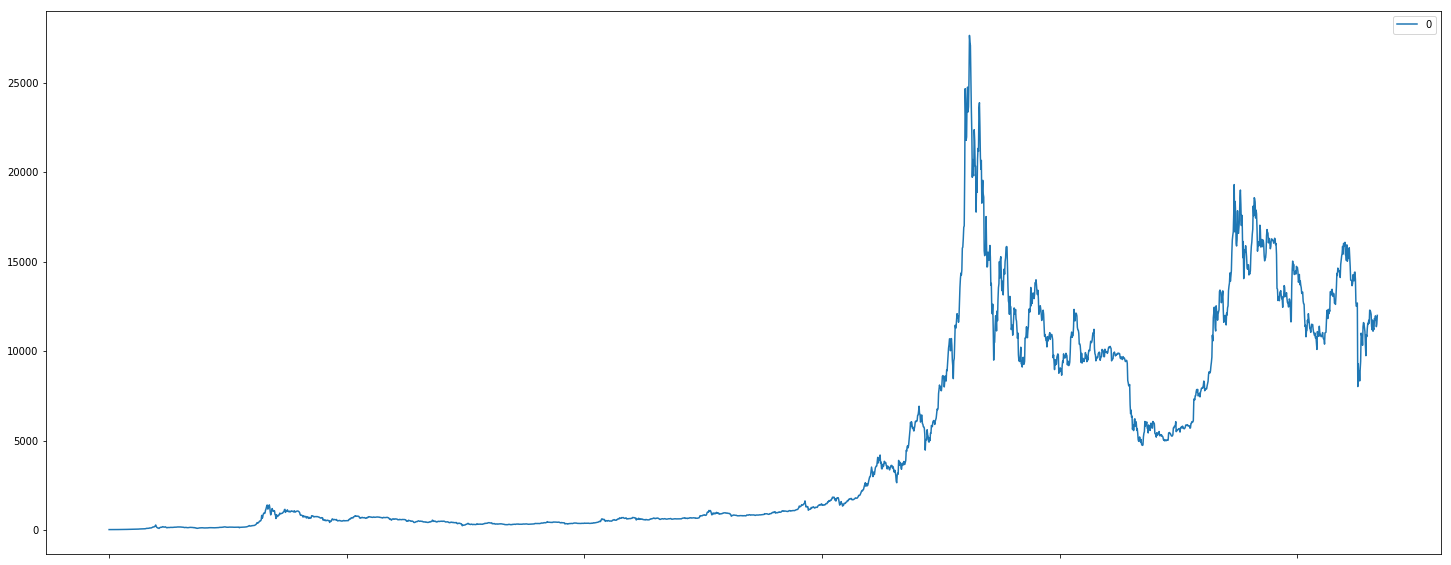

In [133]:
response = requests.get("https://api.coindesk.com/v1/bpi/historical/close.json?currency=NZD&start=2013-01-01&end=2020-04-23")
print(response)
json.loads(response.content)
res = json.loads(response.content)['bpi']
df=pd.DataFrame.from_dict(res, orient='index')
rcParams['figure.figsize'] = 25, 10
df.plot()

### OpenRates

OpenRates (http://www.openrates.io/) delivers and up-to-date exchange rate data for 32 world currencies in JSON format. All currency data is sourced from the European Central Bank. The OpenRates API also offers historical exchange rates back to 1999. 

In [135]:
#base currency is the Euro
response = requests.get("http://api.openrates.io/latest")
print(response)
pp.pprint(json.loads(response.content))


<Response [200]>
{'base': 'EUR',
 'date': '2020-04-22',
 'rates': {'AUD': 1.7199,
           'BGN': 1.9558,
           'BRL': 5.7866,
           'CAD': 1.5375,
           'CHF': 1.0523,
           'CNY': 7.6964,
           'CZK': 27.534,
           'DKK': 7.4589,
           'GBP': 0.8792,
           'HKD': 8.422,
           'HRK': 7.57,
           'HUF': 355.11,
           'IDR': 16935.13,
           'ILS': 3.85,
           'INR': 83.1685,
           'ISK': 158.6,
           'JPY': 117.01,
           'KRW': 1339.66,
           'MXN': 26.3895,
           'MYR': 4.7437,
           'NOK': 11.6775,
           'NZD': 1.82,
           'PHP': 55.096,
           'PLN': 4.5349,
           'RON': 4.8391,
           'RUB': 83.1961,
           'SEK': 10.9423,
           'SGD': 1.5508,
           'THB': 35.176,
           'TRY': 7.6008,
           'USD': 1.0867,
           'ZAR': 20.4413}}


**Exercise**: Modify the above query in order to extract the latest exchange rates showing how many NZD dollars a SGD dollar buys. 

In [140]:
response = requests.get("http://api.openrates.io/latest?base=SGD&symbols=NZD")
print(response)
pp.pprint(json.loads(response.content))


<Response [200]>
{'base': 'SGD', 'date': '2020-04-22', 'rates': {'NZD': 1.1735878256}}


**Exercise**: Make API queries that will enable you to quantify the percentage change in the number of Australian dollars a NZ dollar could buy between today and exactly one year ago.

In [143]:
response = requests.get("http://api.openrates.io/latest?base=NZD&symbols=AUD")
print(response)
pp.pprint(json.loads(response.content))

<Response [200]>
{'base': 'NZD', 'date': '2020-04-22', 'rates': {'AUD': 0.945}}


In [146]:
response = requests.get("http://api.openrates.io/2019-04-23?base=NZD&symbols=AUD")
print(response)
pp.pprint(json.loads(response.content))


<Response [200]>
{'base': 'NZD', 'date': '2019-04-23', 'rates': {'AUD': 0.936349103}}


In [19]:
response_latest = requests.get("http://api.openrates.io/latest?base=NZD&symbols=AUD")
print(response_latest)
response_old = requests.get("http://api.openrates.io/2019-04-23?base=NZD&symbols=AUD")
print(response_old)
latest = json.loads(response_latest.content)['rates']['AUD']
old = json.loads(response_old.content)['rates']['AUD']
print(latest)
print(old)
change = round((latest-old)/old * 100, 2)
print(str(change) + '%')

<Response [200]>
<Response [200]>
0.9417486521
0.936349103
0.58%


### RestCountries

REST Countries (https://restcountries.eu/) provides high level information about a comprehensive set of countries. 

In [147]:
response = requests.get("https://restcountries.eu/rest/v2/all")
print(response)
json.loads(response.content)


<Response [200]>


[{'name': 'Afghanistan',
  'topLevelDomain': ['.af'],
  'alpha2Code': 'AF',
  'alpha3Code': 'AFG',
  'callingCodes': ['93'],
  'capital': 'Kabul',
  'altSpellings': ['AF', 'Afġānistān'],
  'region': 'Asia',
  'subregion': 'Southern Asia',
  'population': 27657145,
  'latlng': [33.0, 65.0],
  'demonym': 'Afghan',
  'area': 652230.0,
  'gini': 27.8,
  'timezones': ['UTC+04:30'],
  'borders': ['IRN', 'PAK', 'TKM', 'UZB', 'TJK', 'CHN'],
  'nativeName': 'افغانستان',
  'numericCode': '004',
  'currencies': [{'code': 'AFN', 'name': 'Afghan afghani', 'symbol': '؋'}],
  'languages': [{'iso639_1': 'ps',
    'iso639_2': 'pus',
    'name': 'Pashto',
    'nativeName': 'پښتو'},
   {'iso639_1': 'uz',
    'iso639_2': 'uzb',
    'name': 'Uzbek',
    'nativeName': 'Oʻzbek'},
   {'iso639_1': 'tk',
    'iso639_2': 'tuk',
    'name': 'Turkmen',
    'nativeName': 'Türkmen'}],
  'translations': {'de': 'Afghanistan',
   'es': 'Afganistán',
   'fr': 'Afghanistan',
   'ja': 'アフガニスタン',
   'it': 'Afghanistan',
  

An API call to RestCountries can return a list of countries that a target country shares a border with, as well as the GINI coefficient that signifies income inequalities.


**Exercise**: Make a set of API quesries which returns a list of countries with which Venezuela shares a border, then plot the GINI coefficient for all these countries including Venezuela. 

### Current International Space Station Details

http://open-notify.org/Open-Notify-API/

Examples below are taken from: https://www.dataquest.io/blog/python-api-tutorial/

Below is an example of querying the ISS in order to find out the location of the space station.

In [150]:
# Make a get request to get the latest position of the international space station from the opennotify api.
response = requests.get("http://api.open-notify.org/iss-now.json")

# Print the status code of the response.
print(response.status_code)

200


In [151]:
response.content

b'{"message": "success", "iss_position": {"latitude": "-50.4783", "longitude": "-97.5776"}, "timestamp": 1587609781}'

The example API query below returns a list of upcoming ISS passes for a particular location formatted as JSON.

In [152]:
import pprint as pp

In [153]:
# Set up the parameters we want to pass to the API.
# This is the latitude and longitude of New York City.
parameters = {"lat": 40.71, "lon": -74}

# Make a get request with the parameters.
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

# Print the content of the response (the data the server returned)
pp.pprint(json.loads(response.content))

{'message': 'success',
 'request': {'altitude': 100,
             'datetime': 1587606810,
             'latitude': 40.71,
             'longitude': -74.0,
             'passes': 5},
 'response': [{'duration': 552, 'risetime': 1587634037},
              {'duration': 654, 'risetime': 1587639770},
              {'duration': 594, 'risetime': 1587645636},
              {'duration': 563, 'risetime': 1587651521},
              {'duration': 626, 'risetime': 1587657348}]}


In [154]:
# This gets the same data as the command above
response = requests.get("http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74")
pp.pprint(json.loads(response.content))

{'message': 'success',
 'request': {'altitude': 100,
             'datetime': 1587606810,
             'latitude': 40.71,
             'longitude': -74.0,
             'passes': 5},
 'response': [{'duration': 552, 'risetime': 1587634037},
              {'duration': 654, 'risetime': 1587639770},
              {'duration': 594, 'risetime': 1587645636},
              {'duration': 563, 'risetime': 1587651521},
              {'duration': 626, 'risetime': 1587657348}]}


**Exercise:** Find the latitude and longitude for Auckland and query the API for ISS as to when the predicted flybys over Auckland will be.

**Exercise:** Iterate through the results of the above query and convert the flyover time from Epoch Time to local time expressed in a readable format.

In [155]:
import time



Using this API, we can also find out programatically how many astronauts are currently in the ISS and who they are: 

In [156]:
# Get the response from the API endpoint.
response = requests.get("http://api.open-notify.org/astros.json")
data = response.json()

# 9 people are currently in space.
print(data["number"])
pp.pprint(data)

3
{'message': 'success',
 'number': 3,
 'people': [{'craft': 'ISS', 'name': 'Chris Cassidy'},
            {'craft': 'ISS', 'name': 'Anatoly Ivanishin'},
            {'craft': 'ISS', 'name': 'Ivan Vagner'}]}


### GeoNet API

https://www.geonet.org.nz/

> GeoNet is the result of a partnership between the Earthquake Commission (EQC), GNS Science, and Land Information New Zealand (LINZ). The GeoNet project was established in 2001 to build and operate a modern geological hazard monitoring system in New Zealand. It comprises a network of geophysical instruments, automated software applications and skilled staff to detect, analyse and respond to earthquakes, volcanic activity, large landslides, tsunami and the slow deformation that precedes large earthquakes.


GeoNet has an API from which latest seismic activity in the NZ region can be accessed: https://api.geonet.org.nz/


Here is an example of how to query their API and extract all recent seismic activity that was at or above the Modified Mercalli Intensity scale (MMI)(https://en.wikipedia.org/wiki/Mercalli_intensity_scale)

See https://api.geonet.org.nz/quake?MMI=3 for an example of the returned JSON object format.

In [157]:
response = requests.get("https://api.geonet.org.nz/quake?MMI=3")
#print(response.content)
res = json.loads(response.content)
pp.pprint(res)

{'features': [{'geometry': {'coordinates': [174.0140228, -41.0541153],
                            'type': 'Point'},
               'properties': {'depth': 36.04963303,
                              'locality': '20 km south-east of French Pass',
                              'magnitude': 3.059288455,
                              'mmi': 3,
                              'publicID': '2020p304023',
                              'quality': 'best',
                              'time': '2020-04-22T11:43:30.087Z'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [174.1497498, -41.70729828],
                            'type': 'Point'},
               'properties': {'depth': 12.58221531,
                              'locality': '5 km south-east of Seddon',
                              'magnitude': 2.183534985,
                              'mmi': 3,
                              'publicID': '2020p301640',
                              'quality': 'best',
       

We can now search through the JSON object and extract all the seismic activity in the 'Wellington' region for example and print out the magnitude of the quake.


In [158]:
for i in range(len(res['features'])):
        print(res['features'][i]['properties']['locality'], ' - Richter Scale Magnitude: ', res['features'][i]['properties']['magnitude'])

20 km south-east of French Pass  - Richter Scale Magnitude:  3.059288455
5 km south-east of Seddon  - Richter Scale Magnitude:  2.183534985
5 km south-east of Seddon  - Richter Scale Magnitude:  2.431807964
15 km south of Whanganui  - Richter Scale Magnitude:  2.912411233
10 km east of Masterton  - Richter Scale Magnitude:  2.6764254
15 km south-west of Masterton  - Richter Scale Magnitude:  2.994005842
10 km east of Seddon  - Richter Scale Magnitude:  3.624668806
Within 5 km of Culverden  - Richter Scale Magnitude:  1.987414469
20 km east of Seddon  - Richter Scale Magnitude:  3.671599866
15 km north of Pongaroa  - Richter Scale Magnitude:  3.105793633
15 km north of Pongaroa  - Richter Scale Magnitude:  2.9085966
10 km north of Opotiki  - Richter Scale Magnitude:  2.925599867
40 km north-west of Te Anau  - Richter Scale Magnitude:  4.989216099
5 km south of Christchurch  - Richter Scale Magnitude:  3.416684604
10 km north-west of Murchison  - Richter Scale Magnitude:  3.369958136
60 

In [159]:
for i in range(len(res['features'])):
    if res['features'][i]['properties']['locality'].find('Seddon') > -1:
        print(res['features'][i]['properties']['locality'], ' - Richter Scale Magnitude: ', res['features'][i]['properties']['magnitude'])

5 km south-east of Seddon  - Richter Scale Magnitude:  2.183534985
5 km south-east of Seddon  - Richter Scale Magnitude:  2.431807964
10 km east of Seddon  - Richter Scale Magnitude:  3.624668806
20 km east of Seddon  - Richter Scale Magnitude:  3.671599866
5 km east of Seddon  - Richter Scale Magnitude:  2.31037087
5 km south of Seddon  - Richter Scale Magnitude:  2.936456017
5 km east of Seddon  - Richter Scale Magnitude:  2.062983415
5 km south-east of Seddon  - Richter Scale Magnitude:  2.278484232
10 km east of Seddon  - Richter Scale Magnitude:  2.643272277
5 km south of Seddon  - Richter Scale Magnitude:  3.245799985
10 km east of Seddon  - Richter Scale Magnitude:  2.247916242
10 km east of Seddon  - Richter Scale Magnitude:  2.316712625
10 km east of Seddon  - Richter Scale Magnitude:  2.873544427
15 km east of Seddon  - Richter Scale Magnitude:  4.786903019
45 km south-east of Seddon  - Richter Scale Magnitude:  4.722788147
15 km east of Seddon  - Richter Scale Magnitude:  3.

**Exercise:** Modify the above code in order to generate a new query to return all seismic activity that was at or above 2 MMI. Then print all the results for activity in the vicinity of Christchurch, listing both the date of the quake and the depth.a

In [183]:
response = requests.get("https://api.geonet.org.nz/quake?MMI=3")
#print(response.content)
res = json.loads(response.content)

for i in range(len(res['features'])):
    if res['features'][i]['properties']['locality'].find('Christchurch') > -1:
        print(res['features'][i]['properties']['locality'], ' - Richter Scale Magnitude: ', res['features'][i]['properties']['magnitude'])
        print(res['features'][i]['properties']['time'], res['features'][i]['properties']['depth'])

5 km south of Christchurch  - Richter Scale Magnitude:  3.416684604
2020-04-18T03:19:36.418Z 3.642938852
10 km south-west of Christchurch  - Richter Scale Magnitude:  4.278320895
2020-04-08T19:49:16.924Z 5.478522778
10 km east of Christchurch  - Richter Scale Magnitude:  3.209313404
2020-04-03T20:52:15.002Z 6.610325336


**Exercise:** https://api.geonet.org.nz/quake/stats returns the stats of all seismic activity in NZ over the last year. Generate the query that returns this JSON object and then plot the NZ daily seismic activity in NZ over the last year.

In [184]:
response = requests.get("https://api.geonet.org.nz/quake/stats")
#print(response.content)
res = json.loads(response.content)
pp.pprint(res)

{'magnitudeCount': {'days28': {'-1': 1,
                               '0': 81,
                               '1': 770,
                               '2': 597,
                               '3': 101,
                               '4': 52,
                               '5': 7,
                               '6': 1},
                    'days365': {'-1': 2,
                                '0': 966,
                                '1': 9060,
                                '2': 8957,
                                '3': 1382,
                                '4': 883,
                                '5': 210,
                                '6': 8,
                                '7': 1},
                    'days7': {'-1': 1,
                              '0': 15,
                              '1': 184,
                              '2': 149,
                              '3': 29,
                              '4': 13,
                              '5': 2}},
 'rate': {'perDay': {'201

In [185]:
res_dict = res['rate']['perDay']
res_dict

{'2019-04-24T00:00:00+00:00': 65,
 '2019-04-25T00:00:00+00:00': 67,
 '2019-04-26T00:00:00+00:00': 80,
 '2019-04-27T00:00:00+00:00': 61,
 '2019-04-28T00:00:00+00:00': 41,
 '2019-04-29T00:00:00+00:00': 38,
 '2019-04-30T00:00:00+00:00': 50,
 '2019-05-01T00:00:00+00:00': 66,
 '2019-05-02T00:00:00+00:00': 70,
 '2019-05-03T00:00:00+00:00': 72,
 '2019-05-04T00:00:00+00:00': 80,
 '2019-05-05T00:00:00+00:00': 103,
 '2019-05-06T00:00:00+00:00': 79,
 '2019-05-07T00:00:00+00:00': 74,
 '2019-05-08T00:00:00+00:00': 80,
 '2019-05-09T00:00:00+00:00': 59,
 '2019-05-10T00:00:00+00:00': 63,
 '2019-05-11T00:00:00+00:00': 56,
 '2019-05-12T00:00:00+00:00': 35,
 '2019-05-13T00:00:00+00:00': 51,
 '2019-05-14T00:00:00+00:00': 53,
 '2019-05-15T00:00:00+00:00': 48,
 '2019-05-16T00:00:00+00:00': 54,
 '2019-05-17T00:00:00+00:00': 59,
 '2019-05-18T00:00:00+00:00': 44,
 '2019-05-19T00:00:00+00:00': 104,
 '2019-05-20T00:00:00+00:00': 86,
 '2019-05-21T00:00:00+00:00': 100,
 '2019-05-22T00:00:00+00:00': 44,
 '2019-05-2

In [193]:
res_df = pd.DataFrame.from_dict(res_dict, columns=['count'], orient='index').reset_index()
res_df.head()

,index,count
0,2019-04-24T00:00:00+00:00,65
1,2019-04-25T00:00:00+00:00,67
2,2019-04-26T00:00:00+00:00,80
3,2019-04-27T00:00:00+00:00,61
4,2019-04-28T00:00:00+00:00,41


In [194]:
res_df.columns = ['date', 'count']
res_df[['date']] = res_df[['date']].applymap(lambda x : x.replace('T', ' '))
res_df.head()

,date,count
0,2019-04-24 00:00:00+00:00,65
1,2019-04-25 00:00:00+00:00,67
2,2019-04-26 00:00:00+00:00,80
3,2019-04-27 00:00:00+00:00,61
4,2019-04-28 00:00:00+00:00,41


In [195]:
res_df['date'] = pd.to_datetime(res_df['date'])
res_df = res_df.set_index('date')
res_df.head()

,count
date,
2019-04-24,65
2019-04-25,67
2019-04-26,80
2019-04-27,61
2019-04-28,41


In [196]:
res_df = res_df.sort_index()
res_df.head()

,count
date,
2019-04-24,65
2019-04-25,67
2019-04-26,80
2019-04-27,61
2019-04-28,41


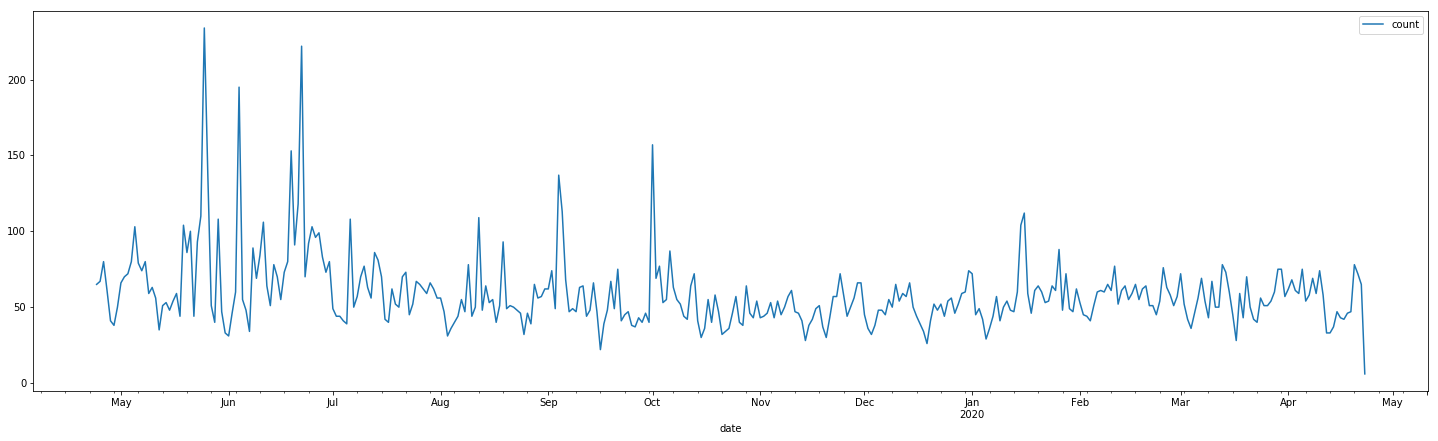

In [197]:
rcParams['figure.figsize'] = 25, 7
res_df.plot()

###  World Bank API

World Bank APIs provide access to various types of data and databases:

    The Indicators API provides programmatic access to time series development data and metadata. Most of the articles in this section are devoted to the Indicators API.

    The Data Catalog API provides information about the thousands of development-relevant datasets available through the World Bank Data Catalog. 

    The Projects API provides access to World Bank operations data, i.e., active, pipeline and closed projects implemented in countries and around the world. 

    The Finances API provides programmatic access to World Bank financial data (loans, credits, financial statements, etc) delivered on the World Bank Finances platform.

    The Climate Data API provides access to historical and modelled climate data from the Climate Knowledge Portal. 


> Source: https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information

In [198]:
# World Bank API - GDP example

indicator =  'NY.GDP.PCAP.CD?date=2000:2018'
url = "http://api.worldbank.org/v2/countries/all/indicators/%s&format=json&per_page=5000" % indicator
print(url)
response = requests.get(url)
print(response)
result = response.content
result = json.loads(result)
result

http://api.worldbank.org/v2/countries/all/indicators/NY.GDP.PCAP.CD?date=2000:2018&format=json&per_page=5000
<Response [200]>


[{'page': 1,
  'pages': 2,
  'per_page': 5000,
  'total': 5016,
  'sourceid': '2',
  'lastupdated': '2020-04-09'},
 [{'indicator': {'id': 'NY.GDP.PCAP.CD',
    'value': 'GDP per capita (current US$)'},
   'country': {'id': '1A', 'value': 'Arab World'},
   'countryiso3code': 'ARB',
   'date': '2018',
   'value': 6608.80697772202,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'NY.GDP.PCAP.CD',
    'value': 'GDP per capita (current US$)'},
   'country': {'id': '1A', 'value': 'Arab World'},
   'countryiso3code': 'ARB',
   'date': '2017',
   'value': 6279.46742538325,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'NY.GDP.PCAP.CD',
    'value': 'GDP per capita (current US$)'},
   'country': {'id': '1A', 'value': 'Arab World'},
   'countryiso3code': 'ARB',
   'date': '2016',
   'value': 6213.7851565211,
   'unit': '',
   'obs_status': '',
   'decimal': 1},
  {'indicator': {'id': 'NY.GDP.PCAP.CD',
    'value': 'GDP per capita (curre

The json object can then be converted into a dataframe :

In [200]:
worldbank_df = pd.DataFrame.from_dict(result[1])
worldbank_df

,country,countryiso3code,date,decimal,indicator,obs_status,unit,value
0,"{'id': '1A', 'value': 'Arab World'}",ARB,2018,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,6608.806978
1,"{'id': '1A', 'value': 'Arab World'}",ARB,2017,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,6279.467425
2,"{'id': '1A', 'value': 'Arab World'}",ARB,2016,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,6213.785157
3,"{'id': '1A', 'value': 'Arab World'}",ARB,2015,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,6458.870159
4,"{'id': '1A', 'value': 'Arab World'}",ARB,2014,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,7498.938317
5,"{'id': '1A', 'value': 'Arab World'}",ARB,2013,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,7552.720310
6,"{'id': '1A', 'value': 'Arab World'}",ARB,2012,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,7504.532525
7,"{'id': '1A', 'value': 'Arab World'}",ARB,2011,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,6890.105514
8,"{'id': '1A', 'value': 'Arab World'}",ARB,2010,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,5946.258579
9,"{'id': '1A', 'value': 'Arab World'}",ARB,2009,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,5182.726580


We need to extract the country from the dict object in the country column:

In [201]:
worldbank_df['country'] = worldbank_df[['country']].applymap(lambda x : x['value'])
worldbank_df

,country,countryiso3code,date,decimal,indicator,obs_status,unit,value
0,Arab World,ARB,2018,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,6608.806978
1,Arab World,ARB,2017,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,6279.467425
2,Arab World,ARB,2016,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,6213.785157
3,Arab World,ARB,2015,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,6458.870159
4,Arab World,ARB,2014,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,7498.938317
5,Arab World,ARB,2013,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,7552.720310
6,Arab World,ARB,2012,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,7504.532525
7,Arab World,ARB,2011,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,6890.105514
8,Arab World,ARB,2010,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,5946.258579
9,Arab World,ARB,2009,1,"{'id': 'NY.GDP.PCAP.CD', 'value': 'GDP per cap...",,,5182.726580


In [202]:
worldbank_df.country.unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

We can next select and rename some of the columns into more meaningful names:

In [203]:
worldbank_df = worldbank_df[['country', 'countryiso3code', 'date', 'value']]
worldbank_df.columns = ['country', 'countryiso3code', 'date', 'GDP_per_capita']
worldbank_df

,country,countryiso3code,date,GDP_per_capita
0,Arab World,ARB,2018,6608.806978
1,Arab World,ARB,2017,6279.467425
2,Arab World,ARB,2016,6213.785157
3,Arab World,ARB,2015,6458.870159
4,Arab World,ARB,2014,7498.938317
5,Arab World,ARB,2013,7552.720310
6,Arab World,ARB,2012,7504.532525
7,Arab World,ARB,2011,6890.105514
8,Arab World,ARB,2010,5946.258579
9,Arab World,ARB,2009,5182.726580


**Exercise:** Plot the GDP per capita for New Zealand from the above dataframe.

In [204]:
worldbank_df[worldbank_df.country=='New Zealand']

,country,countryiso3code,date,GDP_per_capita
3572,New Zealand,NZL,2018,41945.331669
3573,New Zealand,NZL,2017,42260.125177
3574,New Zealand,NZL,2016,40026.852196
3575,New Zealand,NZL,2015,38559.547038
3576,New Zealand,NZL,2014,44533.783091
3577,New Zealand,NZL,2013,42949.142229
3578,New Zealand,NZL,2012,39970.440039
3579,New Zealand,NZL,2011,38426.550808
3580,New Zealand,NZL,2010,33692.010835
3581,New Zealand,NZL,2009,28201.232284


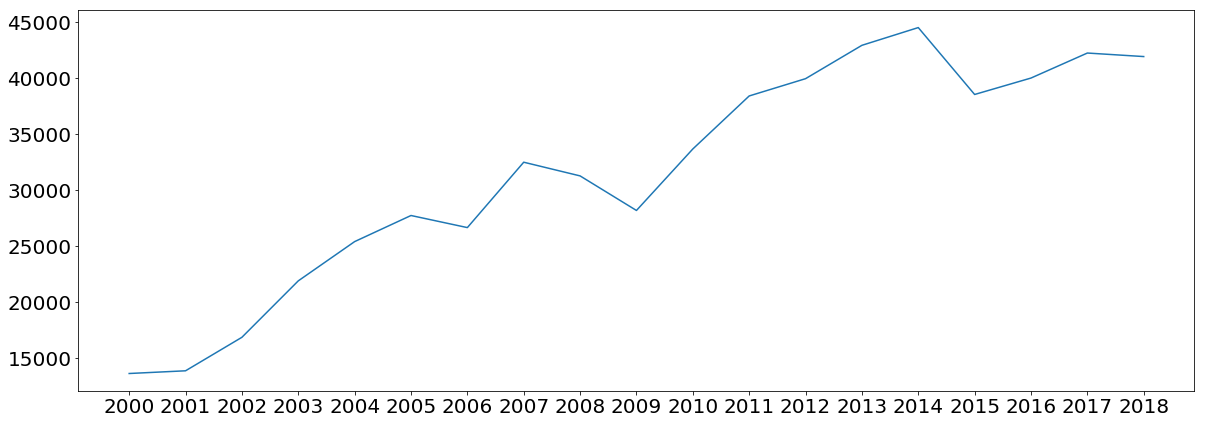

In [205]:
rcParams['figure.figsize'] = 20, 7
rcParams['font.size'] = 20

nz_gdp = worldbank_df[worldbank_df.country=='New Zealand']
nz_gdp = nz_gdp.set_index('date').sort_index()
nz_gdp
plt.plot(nz_gdp.index, nz_gdp.GDP_per_capita)

**Exercise:** Perform the same steps for Singapore and plot the data against that of New Zealand.

**Exercise:** Generate a new API query that extract the net migration numbers for NZ and Australia since the year 2000 then plot them together on the same graph.

###  IMF API

The INternational Monetary Fund provides an API for a comprehensive set of financial and economic indicators whose details can be explored here https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information and http://datahelp.imf.org/knowledgebase/articles/838041-sdmx-2-0-restful-web-service


There are some examples of how to extract data from this API in the following links:

https://briandew.wordpress.com/2016/05/01/machine-reading-imf-data-data-retrieval-with-python/

https://briandew.wordpress.com/2016/08/10/using-the-imf-data-api-data-retrieval-with-python/ 

https://www.bd-econ.com/imfapi1.html


The endpoint for the IMF API service is http://dataservices.imf.org/REST/SDMX_JSON.svc/

A number of different databases can then be appended to the endpoint; however, the documentation is somewhat obscure in terms of usage instructions. 


In [206]:
# this is a request for quarterly (frequency: Q) import price index data (indicator: PMP_IX) for NZ. (reference area: NZ), 
# from the International Financial Statistics (IFS) series.

url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/' #endpoint
database = 'CompactData/IFS/Q.NZ.PMP_IX' # database and indicator


In [207]:
response = requests.get(url + database)
print(response)
result = response.content
result = json.loads(result)
result


<Response [200]>


{'CompactData': {'@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  '@xmlns:xsd': 'http://www.w3.org/2001/XMLSchema',
  '@xsi:schemaLocation': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message https://registry.sdmx.org/schemas/v2_0/SDMXMessage.xsd http://dataservices.imf.org/compact/IFS http://dataservices.imf.org/compact/IFS.xsd',
  '@xmlns': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
  'Header': {'ID': 'a5c5ed96-bbd1-40e3-bcb6-f9231bd540b8',
   'Test': 'false',
   'Prepared': '2020-04-22T23:32:08',
   'Sender': {'@id': '1C0',
    'Name': {'@xml:lang': 'en', '#text': 'IMF'},
    'Contact': {'URI': 'http://www.imf.org',
     'Telephone': '+ 1 (202) 623-6220'}},
   'Receiver': {'@id': 'ZZZ'},
   'DataSetID': 'IFS'},
  'DataSet': {'@xmlns': 'http://dataservices.imf.org/compact/IFS',
   'Series': {'@FREQ': 'Q',
    '@REF_AREA': 'NZ',
    '@INDICATOR': 'PMP_IX',
    '@UNIT_MULT': '0',
    '@BASE_YEAR': '2010=100',
    '@TIME_FORMAT': 'P3M',
    'Obs': [

In [208]:
result.keys()

dict_keys(['CompactData'])

In [209]:
result['CompactData'].keys()

dict_keys(['@xmlns:xsi', '@xmlns:xsd', '@xsi:schemaLocation', '@xmlns', 'Header', 'DataSet'])

In [210]:
result['CompactData']['DataSet'].keys()

dict_keys(['@xmlns', 'Series'])

In [211]:
result['CompactData']['DataSet']['Series'].keys()

dict_keys(['@FREQ', '@REF_AREA', '@INDICATOR', '@UNIT_MULT', '@BASE_YEAR', '@TIME_FORMAT', 'Obs'])

In [212]:
result['CompactData']['DataSet']['Series']['Obs']

[{'@TIME_PERIOD': '1949-Q1', '@OBS_VALUE': '7.09588656406853'},
 {'@TIME_PERIOD': '1949-Q2', '@OBS_VALUE': '7.22608631753767'},
 {'@TIME_PERIOD': '1949-Q3', '@OBS_VALUE': '7.35628607100682'},
 {'@TIME_PERIOD': '1949-Q4', '@OBS_VALUE': '7.61668557794511'},
 {'@TIME_PERIOD': '1950-Q1', '@OBS_VALUE': '7.81198520814884'},
 {'@TIME_PERIOD': '1950-Q2', '@OBS_VALUE': '7.94218496161798'},
 {'@TIME_PERIOD': '1950-Q3', '@OBS_VALUE': '8.07238471508713'},
 {'@TIME_PERIOD': '1950-Q4', '@OBS_VALUE': '8.39788409876'},
 {'@TIME_PERIOD': '1951-Q1', '@OBS_VALUE': '8.52808385222914'},
 {'@TIME_PERIOD': '1951-Q2', '@OBS_VALUE': '9.1139827428403'},
 {'@TIME_PERIOD': '1951-Q3', '@OBS_VALUE': '9.69988163345147'},
 {'@TIME_PERIOD': '1951-Q4', '@OBS_VALUE': '9.96028114038976'},
 {'@TIME_PERIOD': '1952-Q1', '@OBS_VALUE': '10.3508804007972'},
 {'@TIME_PERIOD': '1952-Q2', '@OBS_VALUE': '10.4810801542664'},
 {'@TIME_PERIOD': '1952-Q3', '@OBS_VALUE': '10.2857805240626'},
 {'@TIME_PERIOD': '1952-Q4', '@OBS_VALUE': '

In [213]:
pd.DataFrame.from_dict(result['CompactData']['DataSet']['Series']['Obs'])

,@OBS_VALUE,@TIME_PERIOD
0,7.09588656406853,1949-Q1
1,7.22608631753767,1949-Q2
2,7.35628607100682,1949-Q3
3,7.61668557794511,1949-Q4
4,7.81198520814884,1950-Q1
5,7.94218496161798,1950-Q2
6,8.07238471508713,1950-Q3
7,8.39788409876,1950-Q4
8,8.52808385222914,1951-Q1
9,9.1139827428403,1951-Q2


**Exercise:** Clean up the dataframe and plot the annual percentage change in the NZ Export Price Index Inflation Rate.

**Exercise:** Repeat the same analysis and plot for Australia.

## Dedicated API Wrapper Modules

Well established companies will sometimes write and make available modules in various programming languages that form a wrapper around their REST APIs and an easier interface for communicating with their servers.

Yahoo and Spotify are an example of such companies that provide a Python module. Some of custom-made APIs are free-access and some require an account to be created with them first. Premium content can only be pulled from their servers using a paid Premium account.

Let's look at a custom wrapper for Craigslist:

In [214]:
!pip install python-craigslist

  Running setup.py bdist_wheel for python-craigslist: started
  Running setup.py bdist_wheel for python-craigslist: finished with status 'done'
  Stored in directory: C:\Users\elemi\AppData\Local\pip\Cache\wheels\b3\0a\a4\eb61ec76d82383043359d191321d2f5fa3379a1006f65548d0
Successfully built python-craigslist


In [215]:
from craigslist import CraigslistJobs, CraigslistForSale
CraigslistJobs.show_filters()
print("=========================")
CraigslistForSale.show_filters(category='cta')

Base filters:
* query = ...
* search_titles = True/False
* has_image = True/False
* posted_today = True/False
* bundle_duplicates = True/False
* search_distance = ...
* zip_code = ...
Section specific filters:
* is_internship = True/False
* is_nonprofit = True/False
* is_telecommuting = True/False
* employment_type = 'full-time', 'part-time', 'contract', "employee's choice"
Base filters:
* query = ...
* search_titles = True/False
* has_image = True/False
* posted_today = True/False
* bundle_duplicates = True/False
* search_distance = ...
* zip_code = ...
Section specific filters:
* min_price = ...
* max_price = ...
* make = ...
* model = ...
* min_year = ...
* max_year = ...
* min_miles = ...
* max_miles = ...
* min_engine_displacement = ...
* max_engine_displacement = ...
* language = 'af', 'ca', 'da', 'de', 'en', 'es', 'fi', 'fr', 'it', 'nl', 'no', 'pt', 'sv', 'tl', 'tr', 'zh', 'ar', 'ja', 'ko', 'ru', 'vi'
* condition = 'new', 'like new', 'excellent', 'good', 'fair', 'salvage'
* auto

Find a software developer job in Auckland (codes have been worked out by studying the craigslist website URLs):

In [218]:
from craigslist import CraigslistJobs
cl_j = CraigslistJobs(site='newyork', category='sof',  ## sof for software developeres
                      filters={ 'employment_type': ['full-time', 'part-time']})

for result in cl_j.get_results():
    print(result)


{'id': '7111855075', 'repost_of': '6706542519', 'name': 'Data Science Fellowship', 'url': 'https://newyork.craigslist.org/mnh/sof/d/new-york-city-data-science-fellowship/7111855075.html', 'datetime': '2020-04-21 18:03', 'last_updated': '2020-04-21 18:03', 'price': None, 'where': 'New York City', 'has_image': False, 'geotag': None}
{'id': '7111851961', 'repost_of': '6702170418', 'name': 'Software Engineering Fellowship', 'url': 'https://newyork.craigslist.org/mnh/sof/d/new-york-city-software-engineering/7111851961.html', 'datetime': '2020-04-21 17:57', 'last_updated': '2020-04-21 17:57', 'price': None, 'where': 'Manhattan', 'has_image': False, 'geotag': None}
{'id': '7111173030', 'repost_of': '7068339932', 'name': 'QA Analyst (Remote) | $40 - $43 per hour', 'url': 'https://newyork.craigslist.org/mnh/sof/d/new-york-qa-analyst-remote-per-hour/7111173030.html', 'datetime': '2020-04-20 13:51', 'last_updated': '2020-04-20 13:51', 'price': None, 'where': 'Midtown', 'has_image': False, 'geotag


Find a free food events in New York:

In [219]:
from craigslist import CraigslistEvents
cl_e = CraigslistEvents(site='newyork', filters={'free': True, 'food': True})

for result in cl_e.get_results(sort_by='newest', limit=5):
    print(result)


{'id': '7110635957', 'repost_of': '7062386819', 'name': 'PHOTO SHOOT STUDIO + SERVICE', 'url': 'https://newyork.craigslist.org/brk/eve/d/brooklyn-photo-shoot-studio-service/7110635957.html', 'datetime': None, 'last_updated': None, 'price': None, 'where': 'Brooklyn', 'has_image': True, 'geotag': None}
{'id': '7110635181', 'repost_of': '7062386819', 'name': 'PHOTO SHOOT STUDIO + SERVICE', 'url': 'https://newyork.craigslist.org/brk/eve/d/brooklyn-photo-shoot-studio-service/7110635181.html', 'datetime': None, 'last_updated': None, 'price': None, 'where': 'Brooklyn', 'has_image': True, 'geotag': None}
{'id': '7110634799', 'repost_of': '7062386819', 'name': 'BROOKLYN PHOTOGRAPHY STUDIO $40/HR', 'url': 'https://newyork.craigslist.org/brk/eve/d/brooklyn-brooklyn-photography-studio-40/7110634799.html', 'datetime': None, 'last_updated': None, 'price': None, 'where': 'Brooklyn', 'has_image': True, 'geotag': None}


## API Repositories and Market Places

A large number of other API repositories can be found under these links:

https://any-api.com/

https://market.mashape.com/

A summary of some useful APIs can be found here http://www.computersciencezone.org/50-most-useful-apis-for-developers/ 

http://www.programmableweb.com/apis/directory
